In [1]:
import os
import shutil
from earningtrader.controller.bernoulli_ts_simulator import BernTSController, BernTSControllerBuilder

# build the controller

## generate a temporary path for storing log files and the shelve storage file(s)
tmp_path = os.path.join(os.getcwd(), "tmp")
try:
    os.mkdir(tmp_path)
except FileExistsError:
    shutil.rmtree(tmp_path)
    os.mkdir(tmp_path)

## build the controller
builder = BernTSControllerBuilder()
builder.initialize(logfile_dir=tmp_path)
builder.set_data_fetcher()
builder.set_data_preprocessor()
builder.set_trading_model()
builder.set_storage(db_path=os.path.join(tmp_path, "temp_storage.shelve"))
builder.set_trader()

controller = builder.controller()

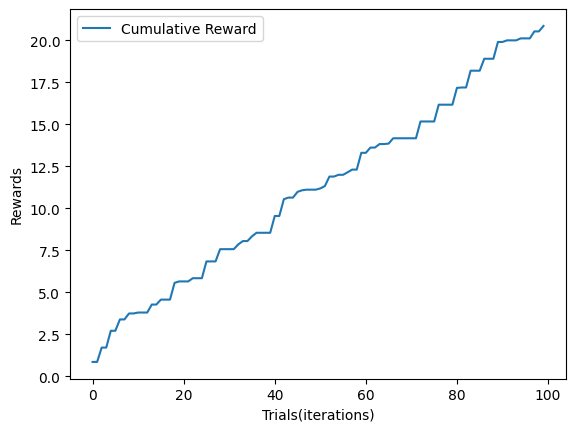

In [2]:
# run the simulation and visulize the result
from itertools import accumulate
from earningtrader.model.bernoulli_ts import BernTSReward
import matplotlib.pyplot as plt

ITERATION = 100

for _ in range(ITERATION):  # 100-days trading simulator
    action = controller.choose_action()
    reward = controller.make_trade(action=action)
    controller.save_reward(reward=reward)

storage = controller._storage
cumul_reward_history = list(accumulate([reward.reward for reward in storage.load_data(key="reward_history")]))

plt.plot(range(ITERATION), cumul_reward_history, label="Cumulative Reward")
plt.xlabel('Trials(iterations)')
plt.ylabel('Rewards')
plt.legend()
plt.show()


In [3]:
# Clean up the simulation
try:
    shutil.rmtree(tmp_path)
except:
    pass